## Make shelf 200m and 700m

In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import numpy as np
import pandas as pd
import cftime
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import sys, os
import warnings
warnings.simplefilter("ignore")
from dask.distributed import Client

from xhistogram.xarray import histogram
from netCDF4 import Dataset    

233.0
807.7250000000004


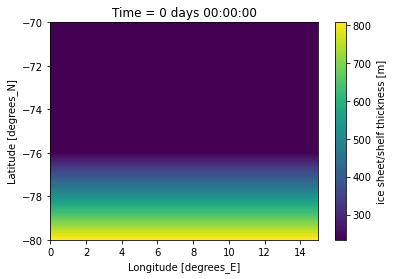

In [2]:
MOM_Shelf_IC = xr.open_dataset('/home/156/cy8964/ISOMIP/MOM_Shelf_IC.nc')
MOM_Shelf_IC.h_shelf.plot()
print(MOM_Shelf_IC.h_shelf.min().values)
print(MOM_Shelf_IC.h_shelf.max().values)

In [3]:
ISOMIP_IC = xr.open_dataset('/home/156/cy8964/mom6-control/ISOMIP/zco_Mathiot/archive/output000/ISOMIP_IC.nc')


-707.3547441580181
-204.04674287516937


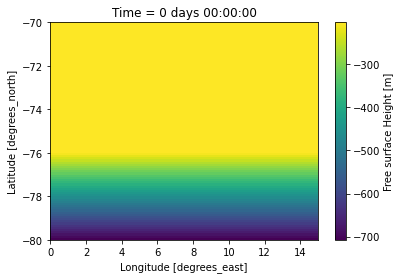

In [4]:
ISOMIP_IC.sfc.plot()
print(ISOMIP_IC.sfc.min().values)
print(ISOMIP_IC.sfc.max().values)


## Pedro's calculation
```
SHELF_MIN_DRAFT = 233
SHELF_MAX_DRAFT = 815
SURFACE_PRESSURE_SCALE = 8820.0
G = 9.80
RHO_0 = 1035.0   
DENSITY_ICE = 900.0
```

In [5]:
900*9.8

8820.0

In [6]:
g = 9.8
rho0 = 1030
rhoice = 900
min_draft = 200*(1030/900)
max_draft = 700*(1030/900)

In [7]:
print(min_draft)
print(max_draft)

228.88888888888889
801.1111111111111


In [8]:
lat = -76
depth = -(max_draft-min_draft)*(lat+76)/4 + min_draft
depth

228.88888888888889

In [9]:
MOM_SHELF_ALT_TEST_h_shelf = MOM_Shelf_IC.h_shelf*0


In [10]:
for i in range(len(MOM_SHELF_ALT_TEST_h_shelf.lath)):
    if MOM_SHELF_ALT_TEST_h_shelf.lath[i]>-76:
        MOM_SHELF_ALT_TEST_h_shelf[:,i,:]=min_draft
    elif MOM_SHELF_ALT_TEST_h_shelf.lath[i]<= -76:
        MOM_SHELF_ALT_TEST_h_shelf[:,i,:]=-(max_draft-min_draft)*(MOM_SHELF_ALT_TEST_h_shelf.lath[i]+76)/4 + min_draft

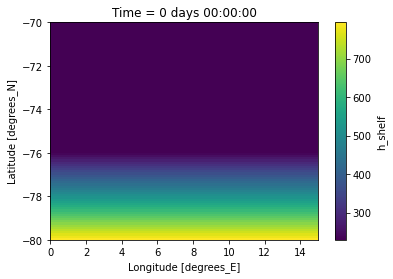

In [11]:
MOM_SHELF_ALT_TEST_h_shelf.plot()

In [12]:
MOM_Shelf_IC

<xarray.Dataset>
Dimensions:     (lath: 100, lonh: 50, Time: 1)
Coordinates:
  * lath        (lath) float64 -79.95 -79.85 -79.75 ... -70.25 -70.15 -70.05
  * lonh        (lonh) float64 0.15 0.45 0.75 1.05 ... 13.95 14.25 14.55 14.85
  * Time        (Time) timedelta64[ns] 00:00:00
Data variables:
    shelf_mass  (Time, lath, lonh) float64 ...
    shelf_area  (Time, lath, lonh) float64 ...
    h_shelf     (Time, lath, lonh) float64 807.7 807.7 807.7 ... 233.0 233.0
    m_to_Z      (Time) float64 ...
    m_to_L      (Time) float64 ...
    kg_m3_to_R  (Time) float64 ...
Attributes:
    filename:  ./MOM_Shelf_IC.nc

In [13]:
ds = xr.Dataset(data_vars={"h_shelf": (["Time","lath","lonh"],MOM_SHELF_ALT_TEST_h_shelf.values,{"units":"m","long_name":"ice sheet/shelf thickness"}),\
                           "shelf_area": (["Time","lath","lonh"],MOM_Shelf_IC.shelf_area.values, {"units":"m2","long_name":"Ice shelf area in cell"})}
)
ds


<xarray.Dataset>
Dimensions:     (Time: 1, lath: 100, lonh: 50)
Dimensions without coordinates: Time, lath, lonh
Data variables:
    h_shelf     (Time, lath, lonh) float64 794.0 794.0 794.0 ... 228.9 228.9
    shelf_area  (Time, lath, lonh) float64 6.473e+07 6.473e+07 ... 1.266e+08

In [14]:
ds.to_netcdf('/home/156/cy8964/ISOMIP/MOM_Shelf_IC_200700Grosveld.nc')